### Data Obtainment and Experimentation
##### We load the appropriate libraries that will be used to download and experiment with the data at a superficial level. 
##### This will allow us to get a 'feel' for how the data is and its overall structure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
obesity = pd.read_csv(r"C:\Users\josie\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip")

In [3]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


##### When presented with categorical variables, knowing what the options are is important.

In [6]:
obesity["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
obesity["family_history_with_overweight"].unique()

array(['yes', 'no'], dtype=object)

In [8]:
obesity["FAVC"].unique()

array(['no', 'yes'], dtype=object)

In [9]:
obesity["CAEC"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [10]:
obesity["SMOKE"].unique()

array(['no', 'yes'], dtype=object)

In [11]:
obesity["SCC"].unique()

array(['no', 'yes'], dtype=object)

In [12]:
obesity["CALC"].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [13]:
obesity["MTRANS"].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [14]:
obesity["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

##### Note that the next cell shows that there are roughly the same amount of labels for each class throughout this dataset, so an accuracy based metric would be acceptable along with others.

In [15]:
obesity["NObeyesdad"].value_counts(ascending=False)

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

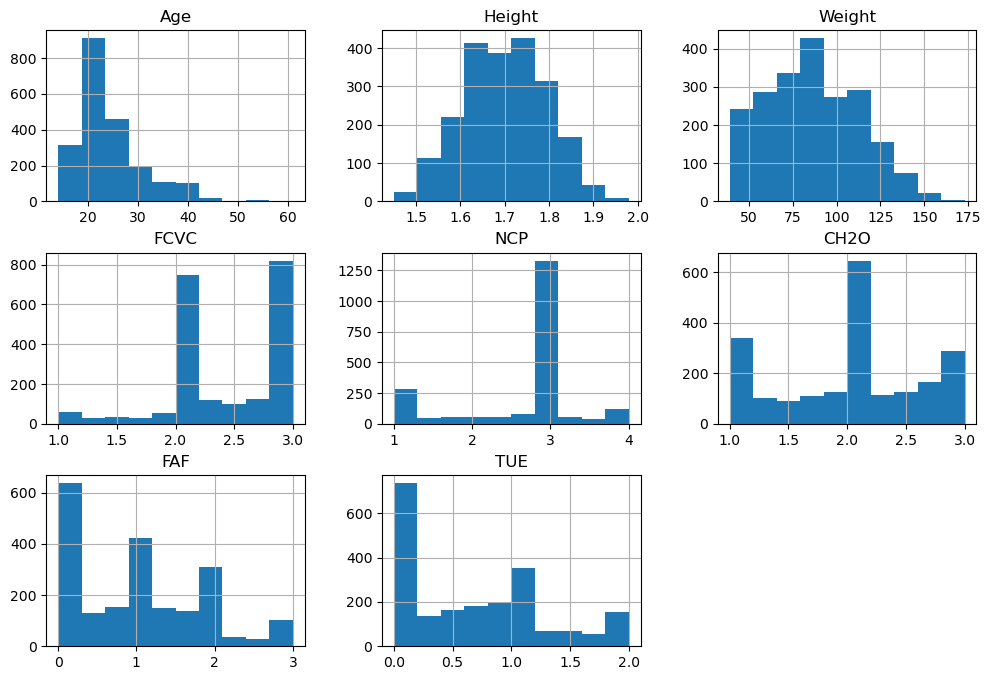

In [16]:
obesity.hist(figsize=(12, 8))
plt.show()

##### At times, we may choose to develop a test set based on the stratification of a particular feature. In this case, we may develop categorization of different weight categories and then set aside a training set and test set based on the "Weight" feature as to have this be equally present in both the training set and test set. In order to do this, we develop an additional and temporary feature, as this new category feature will soon be dropped.

In [17]:
obesity["weight_category"] = pd.cut(obesity["Weight"],
                                    bins=[38., 66., 93., 120., 147., np.inf],
                                    labels=[1, 2, 3, 4, 5])

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(obesity, test_size=0.2, 
                                       stratify=obesity["weight_category"], random_state=42)

In [19]:
obesity["weight_category"].value_counts(ascending=False)/len(obesity["weight_category"])

weight_category
2    0.358598
3    0.269541
1    0.255803
4    0.104216
5    0.011843
Name: count, dtype: float64

In [20]:
train_set["weight_category"].value_counts(ascending=False)/len(train_set["weight_category"])

weight_category
2    0.358412
3    0.269550
1    0.255924
4    0.104265
5    0.011848
Name: count, dtype: float64

In [21]:
test_set["weight_category"].value_counts(ascending=False)/len(test_set["weight_category"])

weight_category
2    0.359338
3    0.269504
1    0.255319
4    0.104019
5    0.011820
Name: count, dtype: float64

##### As shown above, the proportionalities of the formulated "weight_category" feature are consistent between the training set, test set, and entire dataset. It has been useful and will now be discarded.

In [22]:
for set_ in (train_set, test_set, obesity):
    set_.drop("weight_category", axis=1, inplace=True)

##### Now, we may overview the data for further analysis and to gain insight. New features may also be developed.

In [23]:
obesity = train_set.copy()

In [24]:
corr_matrix = obesity.select_dtypes(include=[np.number]).corr()
corr_matrix

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.033082,0.200439,0.031478,-0.060487,-0.058308,-0.140220,-0.294163
Height,-0.033082,1.000000,0.457456,-0.042603,0.222528,0.221217,0.294627,0.039031
Weight,0.200439,0.457456,1.000000,0.230617,0.085415,0.204380,-0.049222,-0.077412
FCVC,0.031478,-0.042603,0.230617,1.000000,0.032860,0.067870,0.022992,-0.092153
NCP,-0.060487,0.222528,0.085415,0.032860,1.000000,0.061292,0.122147,0.039481
CH2O,-0.058308,0.221217,0.204380,0.067870,0.061292,1.000000,0.169334,0.011240
FAF,-0.140220,0.294627,-0.049222,0.022992,0.122147,0.169334,1.000000,0.059374
TUE,-0.294163,0.039031,-0.077412,-0.092153,0.039481,0.011240,0.059374,1.000000


##### When the target class is ordinally categorical, i.e. they can be ordered and are non-numeric, replacing the targets with numbers (appropriately and based on context) can result in gaining an insight into which features are most correlated with the label class. The labels will be converted back to non-numeric after observation of correlations.

In [25]:
obesity["NObeyesdad"].replace("Insufficient_Weight", -1, inplace=True)
obesity["NObeyesdad"].replace("Normal_Weight", 0, inplace=True)
obesity["NObeyesdad"].replace("Overweight_Level_I", 1, inplace=True)
obesity["NObeyesdad"].replace("Overweight_Level_II", 2, inplace=True)
obesity["NObeyesdad"].replace("Obesity_Type_I", 3, inplace=True)
obesity["NObeyesdad"].replace("Obesity_Type_II", 4, inplace=True)
obesity["NObeyesdad"].replace("Obesity_Type_III", 5, inplace=True)

In [26]:
corr_matrix = obesity.select_dtypes(include=[np.number]).corr()
corr_matrix["NObeyesdad"].sort_values(ascending=False)

NObeyesdad    1.000000
Weight        0.912602
Age           0.277451
FCVC          0.249545
CH2O          0.129969
Height        0.124208
NCP           0.008520
TUE          -0.110217
FAF          -0.197715
Name: NObeyesdad, dtype: float64

##### It will often be useful to make new features, especially if it would mean something in regard to the data already present such as by making a BMI feature using the already present weight and height feaures.

In [27]:
obesity["bmi"] = (obesity["Weight"]) / (obesity["Height"]**(2))
obesity["density"] = (obesity["Weight"]) / (obesity["Height"])

In [28]:
corr_matrix = obesity.select_dtypes(include=[np.number]).corr()
corr_matrix["NObeyesdad"].sort_values(ascending=False)

NObeyesdad    1.000000
bmi           0.977972
density       0.959527
Weight        0.912602
Age           0.277451
FCVC          0.249545
CH2O          0.129969
Height        0.124208
NCP           0.008520
TUE          -0.110217
FAF          -0.197715
Name: NObeyesdad, dtype: float64

##### It appears that both the density feature and BMI feature have really high correlations with the transformed labels, both over 0.95 corelation! This will grealy affect the performance of any algorithm, likely enhancing performance.

##### Now, we will revert the labels back to being objects after having been treated like numeric targets.

In [29]:
obesity["NObeyesdad"].replace(-1, "Insufficient_Weight", inplace=True)
obesity["NObeyesdad"].replace(0, "Normal_Weight", inplace=True)
obesity["NObeyesdad"].replace(1, "Overweight_Level_I", inplace=True)
obesity["NObeyesdad"].replace(2, "Overweight_Level_II", inplace=True)
obesity["NObeyesdad"].replace(3, "Obesity_Type_I", inplace=True)
obesity["NObeyesdad"].replace(4, "Obesity_Type_II", inplace=True)
obesity["NObeyesdad"].replace(5, "Obesity_Type_III", inplace=True)
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,bmi,density
134,Male,30.000000,1.770000,109.000000,yes,yes,3.0,3.0,Sometimes,no,1.000000,no,2.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,34.792046,61.581921
377,Male,18.000000,1.760000,68.000000,no,no,2.0,4.0,Frequently,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,21.952479,38.636364
489,Female,19.000000,1.560000,50.000000,no,yes,2.0,1.0,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation,Normal_Weight,20.545694,32.051282
16,Male,27.000000,1.930000,102.000000,yes,yes,2.0,1.0,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,27.383285,52.849741
1802,Female,18.147705,1.802257,149.935848,yes,yes,3.0,3.0,Sometimes,no,2.181811,no,1.995582,0.939665,Sometimes,Public_Transportation,Obesity_Type_III,46.160663,83.193378


In [30]:
obesity = train_set.drop("NObeyesdad", axis=1)
obesity_labels = train_set["NObeyesdad"].copy()

##### Now we may begin to prepare the data, having converted the targets back to their original format. Note that when there is missing data this can be addressed using imputation whereas categorical data may be addressed using encoding.

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

##### There should also be appropriate scaling to the numeric features, and we can make sure there is limited skewness using the skew() function in the scipy.stats package. When there is high skew, such as when it is outside of (-0.5, 0.5), then it may be fixed using transformations such as with numpy's np.sqrt(), np.log(), another function, or a custom function.

In [32]:
from scipy.stats import skew
obesity_num = obesity.select_dtypes(include=[np.number])
obesity_cat = obesity.select_dtypes(include=object)
skew(obesity_num).reshape(-1, 2)

array([[ 1.58281214, -0.00919106],
       [ 0.24184271, -0.44014443],
       [-1.11360683, -0.08651932],
       [ 0.48715359,  0.60127683]])

In [33]:
np.array(obesity_num.columns).reshape(-1, 2)

array([['Age', 'Height'],
       ['Weight', 'FCVC'],
       ['NCP', 'CH2O'],
       ['FAF', 'TUE']], dtype=object)

In [34]:
skew(np.reciprocal(obesity_num["Age"]))

-0.34936041543032176

In [35]:
skew(np.square(obesity_num["NCP"]))

-0.3897498215196923

In [36]:
skew(np.sqrt(obesity_num["TUE"]))

-0.22981178555393902

##### Automation using pipelines is a staple of machine learning, as it makes things substantially more convenient and less temporally demanding. The needed transformations that prevent heavy skewness will need to have their own pipelines and all be put together. A column transformer will be made up of several pipelines, some addressing a single feature and others addressing multiple; our density and BMI features will be made using this preprocessing step.

In [37]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer

In [38]:
def density(X):
    return (X[:, [0]]) / (X[:, [1]])

def density_name(function_transformer, feature_names_in):
    return ["density"]

def density_pipeline():
    return make_pipeline(
        KNNImputer(),
        FunctionTransformer(density, feature_names_out=density_name),
        StandardScaler())

def bmi(X):
    return (X[:, [0]]) / (X[:, [1]]**2)

def bmi_name(function_transformer, feature_names_in):
    return ["body mass index"]

def bmi_pipeline():
    return make_pipeline(
        KNNImputer(),
        FunctionTransformer(bmi, feature_names_out=bmi_name),
        StandardScaler())

recip_pipeline = make_pipeline(
    KNNImputer(),
    FunctionTransformer(np.reciprocal, feature_names_out="one-to-one"),
    StandardScaler())

sqrt_pipeline = make_pipeline(
    KNNImputer(),
    FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
    StandardScaler())

sqr_pipeline = make_pipeline(
    KNNImputer(),
    FunctionTransformer(np.square, feature_names_out="one-to-one"),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

num_pipeline = make_pipeline(
    KNNImputer(), 
    StandardScaler())

preprocessing = ColumnTransformer([
    ("density", density_pipeline(), ["Weight", "Height"]),
    ("bmi", bmi_pipeline(), ["Weight", "Height"]),
    ("reci", recip_pipeline, ["Age"]),
    ("sqrt", sqrt_pipeline, ["TUE"]),
    ("sqr", sqr_pipeline, ["NCP"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
    remainder=num_pipeline)

##### Before using fit on a training set, we should use k-fold cross-validation and tune hyperparameters to select the optimal algorithms. We will consider softmax regression, a decsion tree classisifer, and a linear support vector classifier.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

softmax_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("softmax_reg", LogisticRegression(max_iter=10_000))
])


print(cross_val_score(softmax_reg, obesity, obesity_labels, cv=5, scoring="f1_micro"))
print(cross_val_score(softmax_reg, obesity, obesity_labels, cv=5, scoring="f1_macro"))

[0.88757396 0.87869822 0.90236686 0.90504451 0.90504451]
[0.88295056 0.87604755 0.89869931 0.89968066 0.90252581]


In [40]:
cross_val_score(softmax_reg, obesity, obesity_labels, cv=5, scoring="accuracy")

array([0.88757396, 0.87869822, 0.90236686, 0.90504451, 0.90504451])

##### Earlier, it was shown that there were roughly the same amount of labels for each class: now we will use a dummy classifier *just in case*, to show that random selection will not perform similarly.

In [41]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(obesity, obesity_labels)
cross_val_score(dummy_clf, obesity, obesity_labels, cv=3, scoring="accuracy")

array([0.1687389 , 0.1669627 , 0.16725979])

##### Fortunately, the dummy classifier suggests poor performance whereas the softmax regression algorithm did not.

##### Now, we will see how a decision tree would perform compared to the softmax regression algorithm.

In [42]:
from sklearn.tree import DecisionTreeClassifier

decitree_clf = Pipeline([
    ("preprocessing", preprocessing), 
    ("dec_tree_clf", DecisionTreeClassifier(max_depth=20, min_samples_split=20, min_samples_leaf=20, random_state=42))
])

print(cross_val_score(decitree_clf, obesity, obesity_labels, cv=5, scoring="f1_micro"))
print(cross_val_score(decitree_clf, obesity, obesity_labels, cv=5, scoring="f1_macro"))

[0.96449704 0.96449704 0.96153846 0.97329377 0.97922849]
[0.96418637 0.96436149 0.9610605  0.97365455 0.97926198]


##### Wow! The decision tree classifier performs considerably well using these performance measurements! Now, let's evaluate one last algorithm before we proceed with the next step of this project.

In [43]:
from sklearn.svm import SVC

svc = Pipeline([
    ("preprocessing", preprocessing),
    ("svc", SVC(kernel="linear", degree=2, probability=True, max_iter=100_000, random_state=42))
])

print(cross_val_score(svc, obesity, obesity_labels, cv=5, scoring="f1_micro"))
print(cross_val_score(svc, obesity, obesity_labels, cv=5, scoring="f1_macro"))

[0.94674556 0.94970414 0.95857988 0.96142433 0.95548961]
[0.94522554 0.94854334 0.95760623 0.95979738 0.95449288]


##### The support vector classifier also performed well, although not as well as the decision tree classifier.

##### Now, we will see if ensembling these algorithms will result in better records according to these performance measurements. That is the reason the "probability" hyperparameter of the SVC algorithm was set equal to "True".

In [44]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("softmax", softmax_reg),
        ("decitree_clf", decitree_clf),
        ("svc", svc)
    ] 
    ,voting="soft"
)

print(cross_val_score(voting_clf, obesity, obesity_labels, cv=5, scoring="f1_micro"))
print(cross_val_score(voting_clf, obesity, obesity_labels, cv=5, scoring="f1_macro"))

[0.96745562 0.9556213  0.97337278 0.98813056 0.97329377]
[0.96646506 0.95544559 0.97300881 0.98757152 0.97233977]


##### So the voting classifier, using soft-voting, performs well, although at times not as well as the individual decision tree. Now, we will tune hyperparameters together, especially since independent tuning and then ensembling evaluates algorithms by themselves while we want to see the algorithms working together.

In [45]:
voting_clf.get_params().keys()

dict_keys(['estimators', 'flatten_transform', 'n_jobs', 'verbose', 'voting', 'weights', 'softmax', 'decitree_clf', 'svc', 'softmax__memory', 'softmax__steps', 'softmax__verbose', 'softmax__preprocessing', 'softmax__softmax_reg', 'softmax__preprocessing__n_jobs', 'softmax__preprocessing__remainder__memory', 'softmax__preprocessing__remainder__steps', 'softmax__preprocessing__remainder__verbose', 'softmax__preprocessing__remainder__knnimputer', 'softmax__preprocessing__remainder__standardscaler', 'softmax__preprocessing__remainder__knnimputer__add_indicator', 'softmax__preprocessing__remainder__knnimputer__copy', 'softmax__preprocessing__remainder__knnimputer__keep_empty_features', 'softmax__preprocessing__remainder__knnimputer__metric', 'softmax__preprocessing__remainder__knnimputer__missing_values', 'softmax__preprocessing__remainder__knnimputer__n_neighbors', 'softmax__preprocessing__remainder__knnimputer__weights', 'softmax__preprocessing__remainder__standardscaler__copy', 'softmax__

##### As shown above, our voting classifier has an *extensive* amount of hyperparameters that can be tuned.

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {'softmax__softmax_reg__C': randint(low=1, high=100),
                   'decitree_clf__dec_tree_clf__max_depth': randint(1, 10_000),
                   'decitree_clf__dec_tree_clf__min_samples_split': randint(2, 100),
                   'decitree_clf__dec_tree_clf__min_samples_leaf': randint(1, 1_000),
                   'svc__svc__C': randint(1, 100),
                   'svc__svc__degree': randint(1, 10)}
                   
                   
rnd_search = RandomizedSearchCV(
    voting_clf, param_distributions=params_distribs, n_iter=25, cv=5,
    scoring="f1_micro", random_state=42)

rnd_search.fit(obesity, obesity_labels)

C:\Users\josie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\josie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\josie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\josie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\josie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (ma

RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('softmax',
                                                           Pipeline(steps=[('preprocessing',
                                                                            ColumnTransformer(remainder=Pipeline(steps=[('knnimputer',
                                                                                                                         KNNImputer()),
                                                                                                                        ('standardscaler',
                                                                                                                         StandardScaler())]),
                                                                                              transformers=[('density',
                                                                                                             Pipeline(steps=[('knnimputer',
                                                                                                                              KNNImputer()),
                                                                                                                             ('functiontransformer',
                                                                                                                              FunctionTransformer(feature_names_out=<fu...
                                        'decitree_clf__dec_tree_clf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209CE6111D0>,
                                        'softmax__softmax_reg__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209CE5A1690>,
                                        'svc__svc__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209CE570950>,
                                        'svc__svc__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209CE627110>},
                   random_state=42, scoring='f1_micro')

In [47]:
rnd_search.best_params_

{'decitree_clf__dec_tree_clf__max_depth': 3105,
 'decitree_clf__dec_tree_clf__min_samples_leaf': 48,
 'decitree_clf__dec_tree_clf__min_samples_split': 24,
 'softmax__softmax_reg__C': 62,
 'svc__svc__C': 88,
 'svc__svc__degree': 5}

In [48]:
final_model = rnd_search.best_estimator_

In [49]:
final_model

VotingClassifier(estimators=[('softmax',
                              Pipeline(steps=[('preprocessing',
                                               ColumnTransformer(remainder=Pipeline(steps=[('knnimputer',
                                                                                            KNNImputer()),
                                                                                           ('standardscaler',
                                                                                            StandardScaler())]),
                                                                 transformers=[('density',
                                                                                Pipeline(steps=[('knnimputer',
                                                                                                 KNNImputer()),
                                                                                                ('functiontransformer',
                                                                                                 FunctionTransformer(feature_names_out=<function density_name at 0x00000209D236...
                                                                                                 StandardScaler())]),
                                                                                ['NCP']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('simpleimputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x00000209D7DD0310>)])),
                                              ('svc',
                                               SVC(C=88, degree=5,
                                                   kernel='linear',
                                                   max_iter=100000,
                                                   probability=True,
                                                   random_state=42))]))],
                 voting='soft')

##### Now we may train the voting classifier on the entire training set. After this, we will evaluate this classifier on the test set in order to get a generalization error.

In [50]:
voting_clf.fit(obesity, obesity_labels)

VotingClassifier(estimators=[('softmax',
                              Pipeline(steps=[('preprocessing',
                                               ColumnTransformer(remainder=Pipeline(steps=[('knnimputer',
                                                                                            KNNImputer()),
                                                                                           ('standardscaler',
                                                                                            StandardScaler())]),
                                                                 transformers=[('density',
                                                                                Pipeline(steps=[('knnimputer',
                                                                                                 KNNImputer()),
                                                                                                ('functiontransformer',
                                                                                                 FunctionTransformer(feature_names_out=<function density_name at 0x00000209D236...
                                                                                                 StandardScaler())]),
                                                                                ['NCP']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('simpleimputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x00000209CE5A88D0>)])),
                                              ('svc',
                                               SVC(degree=2, kernel='linear',
                                                   max_iter=100000,
                                                   probability=True,
                                                   random_state=42))]))],
                 voting='soft')

In [51]:
test_set.head(0)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


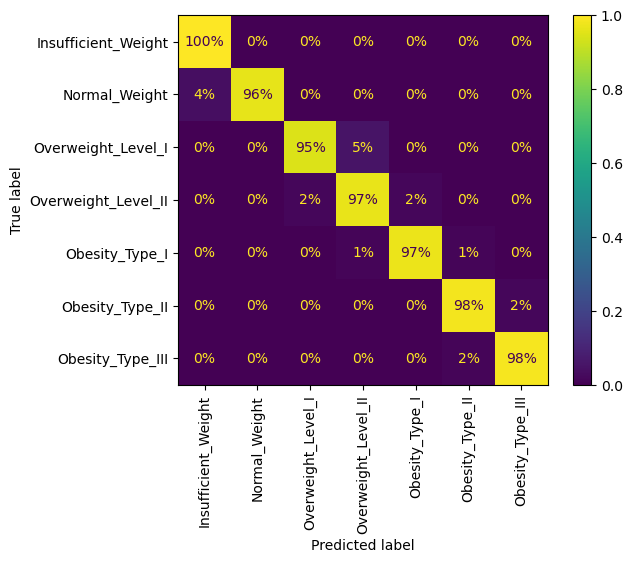

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

X_test = test_set.drop("NObeyesdad", axis=1)
y_test = test_set["NObeyesdad"].copy()

test_predictions = voting_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, normalize="true", values_format=".0%"
                                       , xticks_rotation="vertical", 
                                       labels=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 
                                        'Overweight_Level_II', 'Obesity_Type_I',  'Obesity_Type_II',
                                       'Obesity_Type_III'])
plt.show()

##### The confusion matrix is very suggestive of great performance: each time a class is claimed it is over 95% at worst and over 97% at best! Still, there are several other metrics for evaluating the final model.

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision score for 'macro' measurement is:" + str(precision_score(y_test, test_predictions, average="macro")))
print("Precision score for 'micro' measurement is:" + str(precision_score(y_test, test_predictions, average="micro")))
print("Recall score for 'macro' measurement is:" + str(recall_score(y_test, test_predictions, average="macro")))
print("Recall score for 'micro' measurement is:" + str(recall_score(y_test, test_predictions, average="micro")))
print("F1 score for 'macro' measurement is:" + str(f1_score(y_test, test_predictions, average="macro")))
print("F1 score for 'micro' measurement is:" + str(f1_score(y_test, test_predictions, average="micro")))

Precision score for 'macro' measurement is:0.974728246067248
Precision score for 'micro' measurement is:0.9739952718676123
Recall score for 'macro' measurement is:0.9735673730140963
Recall score for 'micro' measurement is:0.9739952718676123
F1 score for 'macro' measurement is:0.9739599505833272
F1 score for 'micro' measurement is:0.9739952718676123


##### Wow, over 0.97 is not too bad! All of these metrics suggest great model generalization based on performance on the test set.

##### Ensembling is a very capable method, and with there being many algorithms developed and multiple methods to ensemble, the possibilities of an ensemble method is extensive and promising.